In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv(r"D:\ExcelR\Data Science\Assignments\KNN\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## EDA

In [86]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [88]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### Checking for duplicate values and removing them if present 

In [89]:
df.duplicated().sum()

1

In [90]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [91]:
df.drop_duplicates(inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [92]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

## Splitting the data

In [93]:
x = df.iloc[:, :-1]
y = df['Type']

In [94]:
xtrain, xtest, ytrain ,ytest = train_test_split(x, y, test_size=0.2, random_state=1)

## Standardization

In [95]:
ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain), columns=x.columns)
xtest = pd.DataFrame(ss.transform(xtest), columns=x.columns)

In [96]:
xtrain

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.343376,-0.214096,0.777187,-1.353602,-0.874093,-0.557259,0.811071,-0.385603,-0.623642
1,-1.062024,1.720124,-1.838743,1.911682,1.343947,-0.739036,-0.369513,0.639513,-0.623642
2,-0.359742,-0.615093,0.575962,-0.271852,0.472116,0.044005,-0.340542,-0.385603,-0.623642
3,-0.247784,-0.001804,0.700860,-0.552305,0.151590,0.057988,-0.456427,-0.385603,0.457184
4,-0.244392,-0.803798,0.534329,-0.532273,0.677253,0.085954,-0.188442,-0.385603,-0.623642
...,...,...,...,...,...,...,...,...,...
165,-0.712579,1.838065,-1.838743,1.611195,0.805463,-0.739036,-0.137742,0.840875,-0.623642
166,-0.519197,-0.709446,0.603717,0.148829,0.882389,0.183834,-0.724412,-0.385603,-0.623642
167,-0.665082,-0.060774,0.638411,0.208926,0.254158,0.113919,-0.731655,-0.385603,-0.623642
168,0.081304,-0.225890,0.680044,-0.792694,0.202874,0.057988,-0.355027,-0.220852,1.046725


## Model Building

In [97]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
ypred

array([5, 7, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 6,
       2, 1, 2, 3, 2, 2, 2, 1, 5, 6, 1, 1, 1, 1, 1, 1, 2, 1, 1, 7, 7],
      dtype=int64)

In [125]:
result = pd.DataFrame({'Training': knn.score(xtrain, ytrain), 'Testing': knn.score(xtest, ytest)}, index=["Accuracy"])
result

,Training,Testing
Accuracy,0.741176,0.72093


#### We can see that training accuracy is more than testing accuracy threrfore it is an overfitted model, so we will try to make it a generalized model

## Hyper-parameter tuning

In [106]:
test_acc = []
train_acc = []

for i in range(1, 41):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    train_acc.append(model.score(xtrain, ytrain))
    test_acc.append(model.score(xtest, ytest))
    

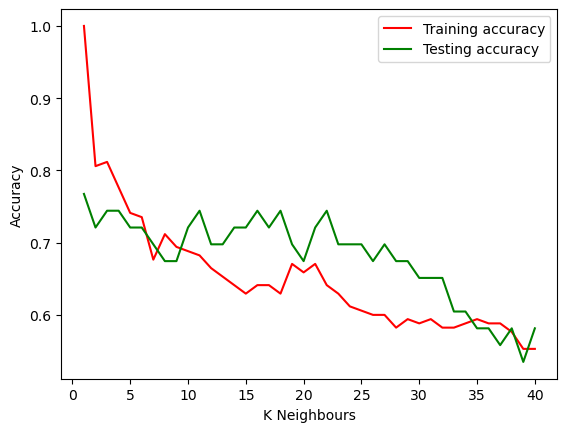

In [107]:
plt.plot(range(1, 41), train_acc, color='red', label='Training accuracy')
plt.plot(range(1, 41), test_acc, color='green', label='Testing accuracy')
plt.xlabel('K-Neighbour Values')
plt.ylabel('Accuracy')
plt.legend()

#### For final model we will use n_neighbours = 6 as we are getting a generalized model

## Final model

In [126]:
final_model = KNeighborsClassifier(n_neighbors=6)
final_model.fit(xtrain, ytrain)
ypred = final_model.predict(xtest)
result = pd.DataFrame({'Training': final_model.score(xtrain, ytrain), 'Testing': final_model.score(xtest, ytest)}, index=["Accuracy"])

In [127]:
result

,Training,Testing
Accuracy,0.735294,0.72093
